In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset = pd.read_csv('Data/data.csv')

In [3]:
dataset = dataset.dropna(axis=1)
dataset = dataset.drop(['id'], axis=1)

In [4]:
x = dataset.iloc[:,1:31].values
y = dataset.iloc[:,0].values

In [5]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [7]:
from imblearn.over_sampling import SMOTE
resampling = SMOTE(sampling_strategy='minority',random_state=0)
x_resampled, y_resampled = resampling.fit_resample(x_train, y_train)

In [8]:
# from imblearn.over_sampling import KMeansSMOTE
# resampling = KMeansSMOTE(sampling_strategy='minority',random_state=0)
# x_resampled, y_resampled = resampling.fit_resample(x_train, y_train)
# # x_resampled, y_resampled = resampling.fit_resample(x_resampled, y_resampled)

In [9]:
# from imblearn.over_sampling import SVMSMOTE
# resampling = SVMSMOTE(sampling_strategy='minority',random_state=0)
# x_resampled, y_resampled = resampling.fit_resample(x_train, y_train)

In [10]:
# from imblearn.over_sampling import BorderlineSMOTE
# resampling = BorderlineSMOTE(sampling_strategy='minority',random_state=0)
# x_resampled, y_resampled = resampling.fit_resample(x_train, y_train)

In [11]:
# from imblearn.combine import SMOTETomek
# resampling = SMOTETomek(sampling_strategy='minority',random_state=0)
# x_resampled, y_resampled = resampling.fit_resample(x_train, y_train)
# # x_resampled, y_resampled = resampling.fit_resample(x_resampled, y_resampled)

In [12]:
# from imblearn.combine import SMOTEENN
# resampling = SMOTEENN(sampling_strategy='minority',random_state=0)
# x_resampled, y_resampled = resampling.fit_resample(x_train, y_train)

In [13]:
# for i in range (1,10):
#     from imblearn.combine import SMOTETomek
#     resampling = SMOTETomek(sampling_strategy='auto',random_state=0)
#     # x_resampled, y_resampled = resampling.fit_resample(x_train, y_train)
#     x_resampled, y_resampled = resampling.fit_resample(x_resampled, y_resampled)

In [14]:
# for i in range (1,10):
#     from imblearn.combine import SMOTEENN
#     resampling = SMOTEENN(sampling_strategy='auto',random_state=0)
#     # x_resampled, y_resampled = resampling.fit_resample(x_train, y_train)
#     x_resampled, y_resampled = resampling.fit_resample(x_resampled, y_resampled)

In [15]:
# from imblearn.over_sampling import ADASYN
# resampling = ADASYN(sampling_strategy='minority',random_state=0)
# x_resampled, y_resampled = resampling.fit_resample(x_train, y_train)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_resampled = sc.fit_transform(x_resampled)
x_test = sc.transform(x_test)

In [17]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

## Logistic Regression Model

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        67
           1       1.00      0.94      0.97        47

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy : 0.9736842105263158


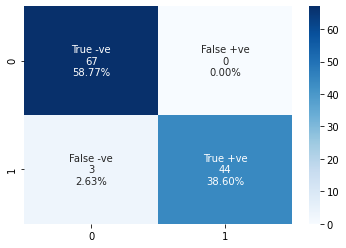

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logistic_model = LogisticRegression(random_state = 0, solver='newton-cg')
logistic_model.fit(x_resampled, y_resampled)

y_predict = logistic_model.predict(x_test)

fpr, tpr, _ = metrics.roc_curve(y_test,  y_predict)
auc = metrics.roc_auc_score(y_test, y_predict)
result_table = result_table.append({'classifiers':'Logistic Regression',
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

cf_matrix = metrics.confusion_matrix(y_test,y_predict)
group_names = ['True -ve', 'False +ve','False -ve','True +ve']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

print(metrics.classification_report(y_test,y_predict))
print('Accuracy :', metrics.accuracy_score(y_test,y_predict))

## K-nearest Neighbour Model

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        67
           1       1.00      0.94      0.97        47

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

The best accuracy was 0.9736842105263158 with k= 10


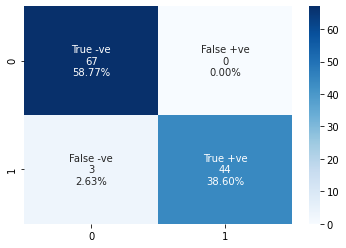

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 30
mean_acc = np.zeros((Ks-1))
confusionMat = []
classificationRpt = []
Y_PREDICT = []

for n in range(1,Ks): 
    knn_model = KNeighborsClassifier(n_neighbors = n).fit(x_resampled,y_resampled)
    y_predict = knn_model.predict(x_test)
    Y_PREDICT.append(y_predict)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_predict)

    confusionMat.append(metrics.confusion_matrix(y_test,y_predict))
    classificationRpt.append(metrics.classification_report(y_test,y_predict))
    
fpr, tpr, _ = metrics.roc_curve(y_test,  Y_PREDICT[mean_acc.argmax()])
auc = metrics.roc_auc_score(y_test, Y_PREDICT[mean_acc.argmax()])
result_table = result_table.append({'classifiers':'K-Nearest Neighbour',
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

cf_matrix = confusionMat[mean_acc.argmax()]
group_names = ['True -ve', 'False +ve','False -ve','True +ve']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

print(classificationRpt[mean_acc.argmax()])
print("The best accuracy was", mean_acc.max(), "with k=", mean_acc.argmax()+1)

## Support Vector Machines

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        67
           1       1.00      0.94      0.97        47

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy : 0.9736842105263158


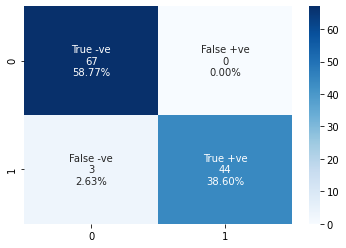

In [20]:
from sklearn.svm import SVC
from sklearn import metrics
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(x_resampled, y_resampled)

y_predict = svc.predict(x_test)

fpr, tpr, _ = metrics.roc_curve(y_test,  y_predict)
auc = metrics.roc_auc_score(y_test, y_predict)
result_table = result_table.append({'classifiers':'SVM',
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

cf_matrix = metrics.confusion_matrix(y_test,y_predict)
group_names = ['True -ve', 'False +ve','False -ve','True +ve']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

print(metrics.classification_report(y_test,y_predict))
print('Accuracy :', metrics.accuracy_score(y_test,y_predict))

## Naive Bayes

              precision    recall  f1-score   support

           0       0.94      0.93      0.93        67
           1       0.90      0.91      0.91        47

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114

Accuracy : 0.9210526315789473


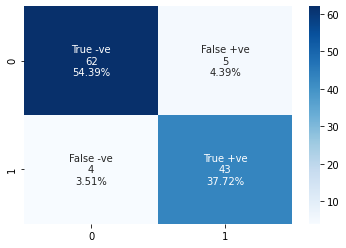

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
gnb = GaussianNB()
gnb.fit(x_resampled, y_resampled)

y_predict = gnb.predict(x_test)

fpr, tpr, _ = metrics.roc_curve(y_test,  y_predict)
auc = metrics.roc_auc_score(y_test, y_predict)
result_table = result_table.append({'classifiers':'Naive Bayes',
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

cf_matrix = metrics.confusion_matrix(y_test,y_predict)
group_names = ['True -ve', 'False +ve','False -ve','True +ve']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

print(metrics.classification_report(y_test,y_predict))
print('Accuracy :', metrics.accuracy_score(y_test,y_predict))

## Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.98      0.91      0.95        67
           1       0.88      0.98      0.93        47

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114

Accuracy : 0.9385964912280702


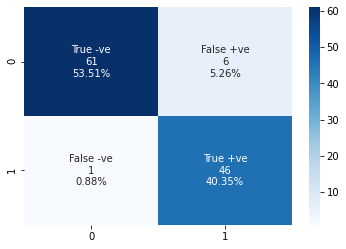

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(x_resampled, y_resampled)

y_predict = tree.predict(x_test)

fpr, tpr, _ = metrics.roc_curve(y_test,  y_predict)
auc = metrics.roc_auc_score(y_test, y_predict)
result_table = result_table.append({'classifiers':'Decision Tree',
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

cf_matrix = metrics.confusion_matrix(y_test,y_predict)
group_names = ['True -ve', 'False +ve','False -ve','True +ve']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

print(metrics.classification_report(y_test,y_predict))
print('Accuracy :', metrics.accuracy_score(y_test,y_predict))

## Random Forest Classifier (Ensemble Class)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        67
           1       0.88      0.94      0.91        47

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114

Accuracy : 0.9210526315789473


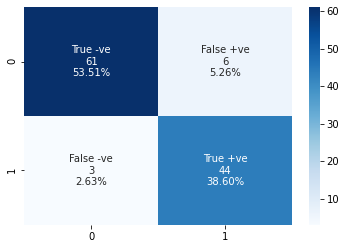

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(x_resampled, y_resampled)

y_predict = forest.predict(x_test)

fpr, tpr, _ = metrics.roc_curve(y_test,  y_predict)
auc = metrics.roc_auc_score(y_test, y_predict)
result_table = result_table.append({'classifiers':'Random Forest',
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

cf_matrix = metrics.confusion_matrix(y_test,y_predict)
group_names = ['True -ve', 'False +ve','False -ve','True +ve']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

print(metrics.classification_report(y_test,y_predict))
print('Accuracy :', metrics.accuracy_score(y_test,y_predict))

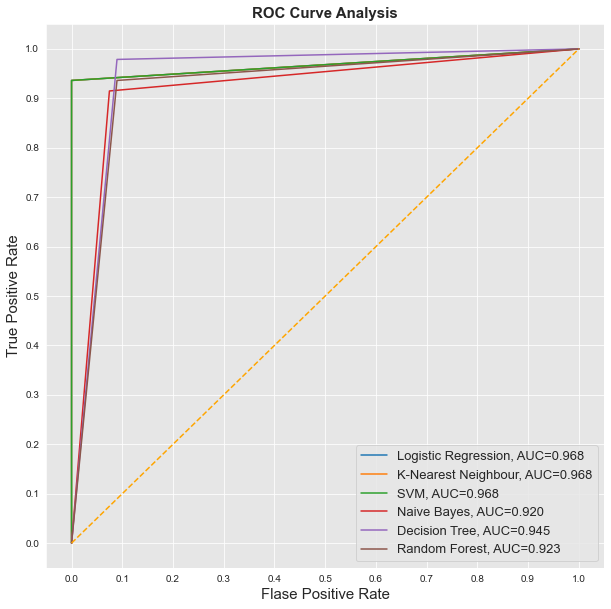

In [24]:
result_table.set_index('classifiers', inplace=True)
fig = plt.figure(figsize=(10,10))
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()